In [50]:
import pandas as pd

## leer 6 archivos de excel distintos
customerAddress = pd.read_csv("../data/raw/200K_CustomerAddress.csv")
generalOrder= pd.read_csv("../data/raw/200K_GeneralOrderDetail.csv")
individualCustomer = pd.read_csv("../data/raw/200K_IndividualCustomer.csv")
ordersList = pd.read_csv("../data/raw/200K_OrdersList.csv")
productOrderDetail = pd.read_csv("../data/raw/200K_ProductOrderDetail.csv")
productCatalog = pd.read_csv("../data/raw/Product_Catalog.csv")

/var/folders/jn/dc5313mj0qs72qr08qqw3w3r0000gn/T/ipykernel_30767/2328653297.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  customerAddress = pd.read_csv("../data/raw/200K_CustomerAddress.csv")
/var/folders/jn/dc5313mj0qs72qr08qqw3w3r0000gn/T/ipykernel_30767/2328653297.py:5: DtypeWarning: Columns (8,39) have mixed types. Specify dtype option on import or set low_memory=False.
  generalOrder= pd.read_csv("../data/raw/200K_GeneralOrderDetail.csv")
/var/folders/jn/dc5313mj0qs72qr08qqw3w3r0000gn/T/ipykernel_30767/2328653297.py:6: DtypeWarning: Columns (7,8,25) have mixed types. Specify dtype option on import or set low_memory=False.
  individualCustomer = pd.read_csv("../data/raw/200K_IndividualCustomer.csv")
/var/folders/jn/dc5313mj0qs72qr08qqw3w3r0000gn/T/ipykernel_30767/2328653297.py:7: DtypeWarning: Columns (9,12,24) have mixed types. Specify dtype option on import or set low_memory=False.
  ordersList = pd.read_csv("../data/r

In [51]:
# Additional imports for comprehensive analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuration for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# DATA EXPLORATORY ANALYSIS    

## 0. Data Overview & Relationships

Understanding the complete dataset structure and how tables relate to each other.

In [52]:
# Dataset Overview Summary
datasets = {
    'Customer Address': customerAddress,
    'General Order': generalOrder,
    'Individual Customer': individualCustomer,
    'Orders List': ordersList,
    'Product Order Detail': productOrderDetail,
    'Product Catalog': productCatalog
}

print("="*80)
print("DATASET OVERVIEW SUMMARY")
print("="*80)

overview_data = []
for name, df in datasets.items():
    overview_data.append({
        'Dataset': name,
        'Rows': f"{len(df):,}",
        'Columns': len(df.columns),
        'Memory (MB)': f"{df.memory_usage(deep=True).sum() / 1024**2:.2f}",
        'Duplicates': f"{df.duplicated().sum():,}",
        'Missing %': f"{(df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100):.2f}%"
    })

overview_df = pd.DataFrame(overview_data)
print(overview_df.to_string(index=False))
print("="*80)

DATASET OVERVIEW SUMMARY
             Dataset    Rows  Columns Memory (MB) Duplicates Missing %
    Customer Address 221,470       25      356.58         33    15.98%
       General Order  67,934       46      122.98          0    41.42%
 Individual Customer 178,494       53      386.65          0    52.74%
         Orders List  67,831       40      171.62          0    21.07%
Product Order Detail  87,610      108      249.21          1    57.46%
     Product Catalog   7,158        6        1.95          0     3.62%


In [53]:
# Identify potential join keys (common column names across tables)
print("\n" + "="*80)
print("POTENTIAL JOIN KEYS (Common Columns)")
print("="*80)

all_columns = {}
for name, df in datasets.items():
    all_columns[name] = set(df.columns)

# Find common columns between datasets
for name1, cols1 in all_columns.items():
    for name2, cols2 in all_columns.items():
        if name1 < name2:  # Avoid duplicates
            common = cols1 & cols2
            if common:
                print(f"\n{name1} ↔ {name2}:")
                for col in sorted(common):
                    print(f"  - {col}")


POTENTIAL JOIN KEYS (Common Columns)

Customer Address ↔ General Order:
  - Cretaed_Timestamp
  - Updaqted_Timestamp

Customer Address ↔ Individual Customer:
  - Cretaed_Timestamp
  - Updaqted_Timestamp
  - accountId
  - accountName
  - auto_filter
  - createdBy
  - createdIn
  - dataEntityId
  - followers
  - id
  - lastInteractionBy
  - lastInteractionIn
  - tags
  - updatedBy
  - updatedIn
  - userId

Customer Address ↔ Orders List:
  - Cretaed_Timestamp
  - Updaqted_Timestamp

Customer Address ↔ Product Order Detail:
  - Cretaed_Timestamp
  - Updaqted_Timestamp
  - id

General Order ↔ Individual Customer:
  - Country
  - Cretaed_Timestamp
  - Updaqted_Timestamp

General Order ↔ Orders List:
  - Country
  - Cretaed_Timestamp
  - SourceSite
  - Updaqted_Timestamp
  - affiliateId
  - authorizedDate
  - creationDate
  - hostname
  - lastChange
  - orderFormId
  - orderId
  - origin
  - salesChannel
  - sequence
  - status
  - statusDescription

General Order ↔ Product Order Detail:
  

## 1. Customer Address

In [54]:
customerAddress.head(10)

,addressName,addressType,city,country,countryfake,geoCoordinate,neighborhood,postalCode,state,userId,id,accountId,accountName,dataEntityId,createdBy,createdIn,updatedBy,updatedIn,lastInteractionBy,lastInteractionIn,followers,tags,auto_filter,Cretaed_Timestamp,Updaqted_Timestamp
0,b7f847462a984eaea560b8b79,residential,GUADALUPE,MEX,NaN,"[-100.2056884765625, 25.717365264892578]",Serena,67129,NUEVO LEÓN,70f350f5-f62e-11ec-835d-0a8fb171123f,59c4c15b-f677-11ec-835d-167e4db3eb5d,28a965fe-6fb5-43ec-a9eb-c67c8aa75ee7,tiendawhirlpoolmx,AD,80ec8b10-25b7-48de-b425-7b93554002cb,2022-06-28 01:00:00,NaN,NaN,80ec8b10-25b7-48de-b425-7b93554002cb,2022-06-28 01:00:00,[],[],NaN,2022-06-29 16:49:55,2022-06-29 16:49:55
1,b7999b2bcf154649a42ec1e66,residential,SAN NICOLÁS DE LOS GARZA,MEX,NaN,"[-100.27811644319432, 25.74423676411608]",Las Puentes Sector 1,66460,NUEVO LEÓN,c21ef477-e9c4-11ec-835d-02978ed58bf1,d4798beb-f67d-11ec-835d-120724bf5efb,28a965fe-6fb5-43ec-a9eb-c67c8aa75ee7,tiendawhirlpoolmx,AD,80ec8b10-25b7-48de-b425-7b93554002cb,2022-06-28 01:00:00,NaN,NaN,80ec8b10-25b7-48de-b425-7b93554002cb,2022-06-28 01:00:00,[],[],NaN,2022-06-29 16:49:55,2022-06-29 16:49:55
2,050e6f3891bf4708aa69bc703,residential,MONTERREY,MEX,NaN,"[-100.26667022705078, 25.69341278076172]",Fontanares Churubusco Sur,64540,NUEVO LEÓN,66021709-f670-11ec-835d-16b245a39a51,15a28e5c-f67b-11ec-835d-0a584cfb942d,28a965fe-6fb5-43ec-a9eb-c67c8aa75ee7,tiendawhirlpoolmx,AD,80ec8b10-25b7-48de-b425-7b93554002cb,2022-06-28 01:00:00,NaN,NaN,80ec8b10-25b7-48de-b425-7b93554002cb,2022-06-28 01:00:00,[],[],NaN,2022-06-29 16:49:55,2022-06-29 16:49:55
3,e80996901a5c43cba050796fb,residential,XOCHIMILCO,MEX,NaN,"[-99.16278076171875, 19.291709899902344]",San Lorenzo La Cebada,16035,CIUDAD DE MÉXICO,79e873e1-e2c7-11ec-835d-1205375cb899,6ea0ab20-f694-11ec-835d-12fdb4261297,28a965fe-6fb5-43ec-a9eb-c67c8aa75ee7,tiendawhirlpoolmx,AD,80ec8b10-25b7-48de-b425-7b93554002cb,2022-06-28 01:00:00,NaN,NaN,80ec8b10-25b7-48de-b425-7b93554002cb,2022-06-28 01:00:00,[],[],NaN,2022-06-29 16:49:55,2022-06-29 16:49:55
4,651e1032d4604100a9d409749,residential,GUADALUPE,MEX,NaN,"[-100.24179077148438, 25.6845645904541]",Azteca,67150,NUEVO LEÓN,89975ae6-f33a-11ec-835d-0ef358621195,148d1a98-f688-11ec-835d-0e0343222f07,28a965fe-6fb5-43ec-a9eb-c67c8aa75ee7,tiendawhirlpoolmx,AD,80ec8b10-25b7-48de-b425-7b93554002cb,2022-06-28 01:00:00,NaN,NaN,80ec8b10-25b7-48de-b425-7b93554002cb,2022-06-28 01:00:00,[],[],NaN,2022-06-29 16:49:55,2022-06-29 16:49:55
5,ea3e0f5bb23e47efac1b03e46,residential,MONTERREY,MEX,NaN,"[-100.30682373046875, 25.643972396850586]",Independencia,64720,NUEVO LEÓN,74dc8cff-e529-11ec-835d-12a16ce67027,a0ccf85d-f688-11ec-835d-16b6e507a135,28a965fe-6fb5-43ec-a9eb-c67c8aa75ee7,tiendawhirlpoolmx,AD,80ec8b10-25b7-48de-b425-7b93554002cb,2022-06-28 01:00:00,NaN,NaN,80ec8b10-25b7-48de-b425-7b93554002cb,2022-06-28 01:00:00,[],[],NaN,2022-06-29 16:49:55,2022-06-29 16:49:55
6,fbc61a1465db458e8b3cd321a,residential,ZAPOPAN,MEX,NaN,"[-103.4146957397461, 20.72429656982422]",Santa Margarita,45140,JALISCO,1266e1ef-f24f-11eb-82ac-169197452e1f,2991bbd7-f689-11ec-835d-0adf23b658a3,28a965fe-6fb5-43ec-a9eb-c67c8aa75ee7,tiendawhirlpoolmx,AD,80ec8b10-25b7-48de-b425-7b93554002cb,2022-06-28 01:00:00,NaN,NaN,80ec8b10-25b7-48de-b425-7b93554002cb,2022-06-28 01:00:00,[],[],NaN,2022-06-29 16:49:55,2022-06-29 16:49:55
7,2f20645cb5cd4b3b89c2801aa,residential,SOLIDARIDAD,MEX,NaN,"[-87.07501220703125, 20.622051239013672]",Ejidal,77712,QUINTANA ROO,2f2df389-d61f-11ec-835d-162bfe278319,f4eac3b7-f68b-11ec-835d-16c54ba1e343,28a965fe-6fb5-43ec-a9eb-c67c8aa75ee7,tiendawhirlpoolmx,AD,80ec8b10-25b7-48de-b425-7b93554002cb,2022-06-28 01:00:00,NaN,NaN,80ec8b10-25b7-48de-b425-7b93554002cb,2022-06-28 01:00:00,[],[],NaN,2022-06-29 16:49:55,2022-06-29 16:49:55
8,6fa561872264413a9acf8dbdb,residential,HERMOSILLO,MEX,NaN,"[-118.24368286132812, 34.0522346496582]",Insurgentes,83106,SONORA,5dcb1bb6-d07a-11ec-835d-0e35bba2c857,e8550bfd-f6a7-11ec-835d-16b6e507a135,28a96

In [55]:
customerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221470 entries, 0 to 221469
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   addressName         221470 non-null  object 
 1   addressType         221470 non-null  object 
 2   city                221470 non-null  object 
 3   country             221470 non-null  object 
 4   countryfake         0 non-null       float64
 5   geoCoordinate       221423 non-null  object 
 6   neighborhood        217181 non-null  object 
 7   postalCode          221470 non-null  object 
 8   state               221470 non-null  object 
 9   userId              221470 non-null  object 
 10  id                  221470 non-null  object 
 11  accountId           221470 non-null  object 
 12  accountName         221470 non-null  object 
 13  dataEntityId        221470 non-null  object 
 14  createdBy           221470 non-null  object 
 15  createdIn           221470 non-nul

In [56]:
customerAddress.describe()

,countryfake,auto_filter
count,0.00,0.00
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [57]:
customerAddress.duplicated().sum()

np.int64(33)

In [58]:
customerAddress.isnull().sum()

addressName                0
addressType                0
city                       0
country                    0
countryfake           221470
geoCoordinate             47
neighborhood            4289
postalCode                 0
state                      0
userId                     0
id                         0
accountId                  0
accountName                0
dataEntityId               0
createdBy                  0
createdIn                  0
updatedBy             218650
updatedIn             218650
lastInteractionBy          0
lastInteractionIn          0
followers                  0
tags                       0
auto_filter           221470
Cretaed_Timestamp          0
Updaqted_Timestamp         0
dtype: int64

In [59]:
customerAddress.dtypes

addressName            object
addressType            object
city                   object
country                object
countryfake           float64
geoCoordinate          object
neighborhood           object
postalCode             object
state                  object
userId                 object
id                     object
accountId              object
accountName            object
dataEntityId           object
createdBy              object
createdIn              object
updatedBy              object
updatedIn              object
lastInteractionBy      object
lastInteractionIn      object
followers              object
tags                   object
auto_filter           float64
Cretaed_Timestamp      object
Updaqted_Timestamp     object
dtype: object

In [60]:
customerAddress.nunique()


addressName           56229
addressType               3
city                   2717
country                   6
countryfake               0
geoCoordinate          6592
neighborhood          20398
postalCode            10759
state                   163
userId                50153
id                    56233
accountId                 9
accountName              13
dataEntityId              1
createdBy               391
createdIn               685
updatedBy               206
updatedIn               511
lastInteractionBy       398
lastInteractionIn       685
followers                 1
tags                      1
auto_filter               0
Cretaed_Timestamp      8669
Updaqted_Timestamp     8669
dtype: int64

In [61]:
customerAddress.columns

Index(['addressName', 'addressType', 'city', 'country', 'countryfake',
       'geoCoordinate', 'neighborhood', 'postalCode', 'state', 'userId', 'id',
       'accountId', 'accountName', 'dataEntityId', 'createdBy', 'createdIn',
       'updatedBy', 'updatedIn', 'lastInteractionBy', 'lastInteractionIn',
       'followers', 'tags', 'auto_filter', 'Cretaed_Timestamp',
       'Updaqted_Timestamp'],
      dtype='object')

## 2. General Order Detail

In [62]:
generalOrder.head(10)

,Country,orderId,sequence,marketplaceOrderId,sellerOrderId,origin,affiliateId,salesChannel,merchantName,status,statusDescription,value,creationDate,lastChange,orderGroup,marketplaceItems,giftRegistryData,ratesAndBenefitsData,followUpEmail,lastMessage,hostname,changesAttachment,openTextField,roundingError,orderFormId,commercialConditionData,isCompleted,allowCancellation,allowEdition,isCheckedIn,authorizedDate,invoicedDate,cancelReason,subscriptionData,taxData,checkedInPickupPointId,ClientId,RequestedByUser,RequestedBySystem,RequestedBySellerNotification,RequestedByPaymentNotification,RequestedByReason,cancellationData.Date,Cretaed_Timestamp,Updaqted_Timestamp,SourceSite
0,CO,MLB-41370001211,850110346,41370001211,NaN,Fulfillment,MLB,4,NaN,handling,Preparando Entrega,20987654.00,2022-05-17 01:00:00,2022-05-18 01:00:00,NaN,[],NaN,NaN,d4f06d10a5f344a3820eb2eb023307fb@ct.vtex.com.br,NaN,whirlpoolcol,NaN,NaN,0,NaN,NaN,True,False,False,False,2022-05-17T20:52:40.0100076+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-10 00:40:13,2022-05-10 00:40:13,WHR CO
1,MX,LKT-v33516186ekt-01,520003,v33516186ekt-01,NaN,Fulfillment,LKT,4,NaN,invoiced,Faturado,839506.00,2021-10-10 01:00:00,2021-10-11 01:00:00,NaN,[],NaN,NaN,d4f06d10a5f344a3820eb2eb023307fb@ct.vtex.com.br,NaN,acrosmx,NaN,{'value': None},0,NaN,NaN,True,False,False,False,2021-10-11T01:07:46.1200832+00:00,2021-10-11T02:02:08.4281516+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-24 11:13:36,2021-11-24 11:13:36,ACR MX
2,CO,MLB-41378800118,850110330,41378800118,NaN,Fulfillment,MLB,4,NaN,handling,Preparando Entrega,96728395.00,2022-05-17 01:00:00,2022-05-18 01:00:00,NaN,[],NaN,NaN,d4f06d10a5f344a3820eb2eb023307fb@ct.vtex.com.br,NaN,whirlpoolcol,NaN,NaN,0,NaN,NaN,True,False,False,False,2022-05-17T20:26:00.1010631+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-10 00:40:13,2022-05-10 00:40:13,WHR CO
3,MX,1167881777015-01,510055,NaN,00-1167881777015-01,Marketplace,NaN,3,NaN,invoiced,Faturado,432593.00,2021-10-10 01:00:00,2021-11-03 00:00:00,1167881777015,[],NaN,NaN,d4f06d10a5f344a3820eb2eb023307fb@ct.vtex.com.br,NaN,acrosmx,NaN,NaN,0,075257b0834544dfae2f8c0d5f83047b,NaN,True,False,False,False,2021-10-10T20:30:57.0000000+00:00,2021-11-03T20:01:46.0747828+00:00,NaN,NaN,NaN,NaN,a68e2d84-7781-467f-8c2b-05f570060001,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-24 11:13:36,2021-11-24 11:13:36,ACR MX
4,CO,v850110335wcol-01,850110335,NaN,00-v850110335wcol-01,Marketplace,NaN,1,NaN,canceled,Cancelado,126241235.00,2022-05-17 01:00:00,2022-05-18 01:00:00,v850110335wcol,[],NaN,Social Sale,25a1086ed6af4d08a4cf7bbdb1db6a61@ct.vtex.com.br,NaN,whirlpoolcol,NaN,NaN,0,d787a7c0cc6340a10dbc06fc072eb40c,NaN,True,False,False,False,NaN,NaN,No se aprobó el pago así que volveré a comprar,NaN,NaN,NaN,26fb40af-2a67-450f-8b6d-dbdb4e1880fb,True,NaN,NaN,NaN,No se aprobó el pago así que volveré a comprar,2022-05-18 01:00:00,2022-05-10 00:40:13,2022-05-10 00:40:13,WHR CO
5,CO,v850110320wcol-01,850110320,NaN,00-v850110320wcol-01,Marketplace,NaN,1,NaN,handling,Preparando Entrega,81204198.00,2022-05-17 01:00:00,2022-05-17 01:00:00,v850110320wcol,[],NaN,Social Sale,8a5c82c8135a431f08c557d4a32af47c@ct.vtex.com.br,NaN,whirlpoolcol,NaN,NaN,0,3a05a008605f4f3ca3151a5508a66e70,NaN,True,True,False,False,2022-05-17T21:10:25.0000000+00:00,NaN,NaN,NaN,NaN,NaN,e56a651e-03ae-4120-a1fd-d41cc1e2df30,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-10 00:40:13,2022-05-10 00:40:13,WHR CO
6,CO,v850110327wcol-01,850110327,NaN,00-v850110327wcol-01,Marketplace,NaN,1,NaN,handling,Preparando Entrega,45061728.00,2022-05-17 01:00:00,2022-05-18 01:00:00,v850110327wcol,[],NaN,NaN,d1c653def0dd44cd04d3162cbcabbf74@ct.vtex.com.br,NaN,whirlpoolcol,NaN,NaN,0,7757d564a0b542e6b78c1f8024c05520,NaN,True,True,False,False,2022-05-17T10:36:18.0000000+00:00,NaN,NaN,NaN,NaN,NaN,dc6446e0-12ea-44a4-b370-5f67aa10708b,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-10 00:40:13,2022-05-10 00:40:13,WHR CO
7,CO,MLB-41380176754,850110322,41380176754,NaN,Fulfillment,MLB,4,NaN,handling

In [63]:
generalOrder.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67934 entries, 0 to 67933
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         67934 non-null  object 
 1   orderId                         67934 non-null  object 
 2   sequence                        67934 non-null  int64  
 3   marketplaceOrderId              4950 non-null   object 
 4   sellerOrderId                   62984 non-null  object 
 5   origin                          67934 non-null  object 
 6   affiliateId                     4950 non-null   object 
 7   salesChannel                    67934 non-null  int64  
 8   merchantName                    1 non-null      object 
 9   status                          67933 non-null  object 
 10  statusDescription               67927 non-null  object 
 11  value                           67934 non-null  float64
 12  creationDate                    

In [64]:
generalOrder.describe()

,sequence,salesChannel,value,giftRegistryData,lastMessage,changesAttachment,roundingError,commercialConditionData,subscriptionData,taxData,checkedInPickupPointId
count,67934.00,67934.00,67934.00,0.00,0.00,0.00,67934.00,0.00,0.00,0.00,0.00
mean,309677900.73,1.86,35863253.14,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN
std,403252183.31,1.25,78904737.36,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN
min,13000.00,1.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN
25%,546111.50,1.00,250000.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN
50%,627420.00,1.00,777778.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN
75%,805115271.00,3.00,37037037.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN
max,850123228.00,8.00,1439506173.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN


In [65]:
generalOrder.duplicated().sum()

np.int64(0)

In [66]:
generalOrder.isnull().sum()


Country                               0
orderId                               0
sequence                              0
marketplaceOrderId                62984
sellerOrderId                      4950
origin                                0
affiliateId                       62984
salesChannel                          0
merchantName                      67933
status                                1
statusDescription                     7
value                                 0
creationDate                          0
lastChange                            0
orderGroup                         4950
marketplaceItems                      0
giftRegistryData                  67934
ratesAndBenefitsData              40100
followUpEmail                         0
lastMessage                       67934
hostname                              0
changesAttachment                 67934
openTextField                     64168
roundingError                         0
orderFormId                        4950


In [67]:
generalOrder.dtypes


Country                            object
orderId                            object
sequence                            int64
marketplaceOrderId                 object
sellerOrderId                      object
origin                             object
affiliateId                        object
salesChannel                        int64
merchantName                       object
status                             object
statusDescription                  object
value                             float64
creationDate                       object
lastChange                         object
orderGroup                         object
marketplaceItems                   object
giftRegistryData                  float64
ratesAndBenefitsData               object
followUpEmail                      object
lastMessage                       float64
hostname                           object
changesAttachment                 float64
openTextField                      object
roundingError                     

In [68]:
generalOrder.nunique()


Country                               6
orderId                           59310
sequence                          51405
marketplaceOrderId                 4832
sellerOrderId                     54450
origin                                2
affiliateId                           9
salesChannel                          7
merchantName                          1
status                               14
statusDescription                    14
value                             10276
creationDate                        630
lastChange                          630
orderGroup                        40810
marketplaceItems                      1
giftRegistryData                      0
ratesAndBenefitsData                520
followUpEmail                     56618
lastMessage                           0
hostname                             15
changesAttachment                     0
openTextField                       414
roundingError                         1
orderFormId                       55585


In [69]:
generalOrder.columns

Index(['Country', 'orderId', 'sequence', 'marketplaceOrderId', 'sellerOrderId',
       'origin', 'affiliateId', 'salesChannel', 'merchantName', 'status',
       'statusDescription', 'value', 'creationDate', 'lastChange',
       'orderGroup', 'marketplaceItems', 'giftRegistryData',
       'ratesAndBenefitsData', 'followUpEmail', 'lastMessage', 'hostname',
       'changesAttachment', 'openTextField', 'roundingError', 'orderFormId',
       'commercialConditionData', 'isCompleted', 'allowCancellation',
       'allowEdition', 'isCheckedIn', 'authorizedDate', 'invoicedDate',
       'cancelReason', 'subscriptionData', 'taxData', 'checkedInPickupPointId',
       'ClientId', 'RequestedByUser', 'RequestedBySystem',
       'RequestedBySellerNotification', 'RequestedByPaymentNotification',
       'RequestedByReason', 'cancellationData.Date', 'Cretaed_Timestamp',
       'Updaqted_Timestamp', 'SourceSite'],
      dtype='object')

## 3. Individual Customer

In [70]:
individualCustomer.head(10)

,Country,isCorporate,tradeName,rclastcart,rclastcartvalue,rclastsession,rclastsessiondate,homePhone,phone,businessPhone,brandPurchasedTag,brandVisitedTag,categoryPurchasedTag,categoryVisitedTag,departmentVisitedTag,productPurchasedTag,productVisitedTag,email,userId,firstName,lastName,document,isNewsletterOptIn,localeDefault,attach,approved,birthDate,carttag,checkouttag,corporateDocument,corporateName,documentType,gender,visitedProductWithStockOutSkusTag,customerClass,priceTables,profilePicture,birthDateMonth,id,accountId,accountName,dataEntityId,createdBy,createdIn,updatedBy,updatedIn,lastInteractionBy,lastInteractionIn,followers,tags,auto_filter,Cretaed_Timestamp,Updaqted_Timestamp
0,MX,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,rcxotiggo8408@xmxig.com,f1ace526-a249-4cec-b47d-d4b00c035d9b,rxbgo,Cxotiggo,NaN,False,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X4,NaN,NaN,76565828-d18c-11ec-835d-12f2bb1ab51b,28a965fe-6fb5-43ec-a9eb-c67c8aa75ee7,tiendawhirlpoolmx,CL,fa0ff228-7c5c-4625-8e59-ff673dc933fc,2022-05-12 01:00:00,1d30027b-1293-4e28-90d0-8dea26a87031,2022-05-12 01:00:00,1d30027b-1293-4e28-90d0-8dea26a87031,2022-05-12 01:00:00,[],[],NaN,2022-05-14 00:49:56,2022-05-14 00:49:56
1,MX,0.0,NaN,NaN,0,NaN,NaN,198111968099.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,kxxmi_mxxixix_xouxo@nsixgrwxg.com,3e3c5cf1-db7d-4718-9c32-597adc65ce36,Kxxmi mxxixix,xouxo xommz,NaN,True,NaN,NaN,0.00,1999-06-17T00:00:00Z,0.00,NaN,NaN,NaN,NaN,female,NaN,NaN,X4,NaN,6.00,ef3256aa-d1ff-11ec-835d-0ac33e12cabb,28a965fe-6fb5-43ec-a9eb-c67c8aa75ee7,tiendawhirlpoolmx,CL,fa0ff228-7c5c-4625-8e59-ff673dc933fc,2022-05-12 01:00:00,4a63ecb4-cb17-44a9-a284-6b5a4d76ea48,2022-05-12 01:00:00,4a63ecb4-cb17-44a9-a284-6b5a4d76ea48,2022-05-12 01:00:00,[],[],NaN,2022-05-14 00:49:56,2022-05-14 00:49:56
2,MX,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,uxmitmxixx@xmxig.com,d3c42b55-c52e-4695-b12e-11ab0112a1fe,uuxi xobmxto,xmitmxix xoizxgmz,NaN,False,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X4,NaN,NaN,a0e1e7dd-d1ff-11ec-835d-0ac3a2209903,28a965fe-6fb5-43ec-a9eb-c67c8aa75ee7,tiendawhirlpoolmx,CL,fa0ff228-7c5c-4625-8e59-ff673dc933fc,2022-05-12 01:00:00,1d30027b-1293-4e28-90d0-8dea26a87031,2022-05-12 01:00:00,1d30027b-1293-4e28-90d0-8dea26a87031,2022-05-12 01:00:00,[],[],NaN,2022-05-14 00:49:56,2022-05-14 00:49:56
3,MX,0.0,NaN,add?sku=3013&qty=1&seller=1&sku=999990&qty=1&s...,402911,cfa5641b-1212-45d3-b808-849b1c30e3c1,2022-05-12 01:00:00,198194940697.00,NaN,NaN,Whirlpool,NaN,Consumibles,NaN,NaN,855.00,0.00,uoixtsxixicxxjo.xobgmo@cgxxiwx.com,eed5119f-c0d3-4316-809b-df59c9d69b06,uOixTsxi xICxxjO,xOBgmo xxmwx,NaN,False,es-MX,NaN,NaN,NaN,4029.11,Finalizado,499313899,CgxxIwx,NaN,NaN,NaN,NaN,w2,NaN,NaN,5f405a66-d1f2-11ec-835d-0a0becf90e07,28a965fe-6fb5-43ec-a9eb-c67c8aa75ee7,tiendawhirlpoolmx,CL,fa0ff228-7c5c-4625-8e59-ff673dc933fc,2022-05-12 01:00:00,80ec8b10-25b7-48de-b425-7b93554002cb,2022-05-12 01:00:00,80ec8b10-25b7-48de-b425-7b93554002cb,2022-05-12 01:00:00,[],[],NaN,2022-05-14 00:49:56,2022-05-14 00:49:56
4,MX,1.0,NaN,add?sku=3382&qty=1&seller=1&sc=3,266728,4c369edb-d271-4e17-8f2b-f95d67031568,2022-05-12 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,uoxxm.xommz5@outgwxk.com,9b2096e9-885f-44b3-b992-b8ccc1a38a2a,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,2667.28,Carrinho,499268799,gxyOxxTOxIwx rIox,NaN,NaN,NaN,NaN,w1,NaN,NaN,0fb0a6e4-d1ff-11ec-835d-0aaf19ecc263,28a965fe-6fb5-43ec-a9eb-c67c8aa75ee7,tiendawhirlpoolmx,CL,fa0ff228-7c5c-4625-8e59-ff673dc933fc,2022-05-12 01:00:00,80ec8b10-25b7-48de-b425-7b93554002cb,2022-05-12 01:00:00,80ec8b10-25b7-48de-b425-7b93554002cb,2022-05-12 01:00:00,[],[],NaN,2022-05-14 00:49:56,2022-05-14 00:49:56
5,MX,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,mxikxumsgmm2@xmxig.com,694ba6fc-c49e-4b32-8c91-ad241ef61416,mxikx,u,NaN,False,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X4,NaN,NaN,d9a4913a-d1a3-11ec-835d-12b7f2ce60cd,28a965fe-6fb5-43ec-a9eb-c67c8aa75ee7,tiendawhirlpoolmx,CL,fa0

In [71]:
individualCustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178494 entries, 0 to 178493
Data columns (total 53 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Country                            178494 non-null  object 
 1   isCorporate                        81160 non-null   object 
 2   tradeName                          296 non-null     object 
 3   rclastcart                         77415 non-null   object 
 4   rclastcartvalue                    178494 non-null  int64  
 5   rclastsession                      95848 non-null   object 
 6   rclastsessiondate                  95848 non-null   object 
 7   homePhone                          48979 non-null   object 
 8   phone                              26442 non-null   object 
 9   businessPhone                      782 non-null     object 
 10  brandPurchasedTag                  23171 non-null   object 
 11  brandVisitedTag                    3988

In [72]:
individualCustomer.describe()

,rclastcartvalue,productPurchasedTag,productVisitedTag,attach,carttag,visitedProductWithStockOutSkusTag,customerClass,profilePicture,birthDateMonth,auto_filter
count,178494.00,178494.00,178494.00,0.00,178494.00,4092.00,0.00,0.00,13695.00,0.00
mean,7937189.90,44.92,66.90,NaN,79371.90,6753.09,NaN,NaN,7.23,NaN
std,35068423.20,170.25,195.51,NaN,350684.23,79443.15,NaN,NaN,3.25,NaN
min,0.00,0.00,0.00,NaN,0.00,2.00,NaN,NaN,1.00,NaN
25%,0.00,0.00,0.00,NaN,0.00,126.00,NaN,NaN,5.00,NaN
50%,0.00,0.00,0.00,NaN,0.00,233.00,NaN,NaN,7.00,NaN
75%,266728.00,0.00,0.00,NaN,2667.28,382.00,NaN,NaN,10.00,NaN
max,1976863283.00,1758.00,1758.00,NaN,19768632.83,1000126.00,NaN,NaN,12.00,NaN


In [73]:
individualCustomer.duplicated().sum()

np.int64(0)

In [74]:
individualCustomer.isnull().sum()

Country                                   0
isCorporate                           97334
tradeName                            178198
rclastcart                           101079
rclastcartvalue                           0
rclastsession                         82646
rclastsessiondate                     82646
homePhone                            129515
phone                                152052
businessPhone                        177712
brandPurchasedTag                    155323
brandVisitedTag                      138613
categoryPurchasedTag                 155323
categoryVisitedTag                   164029
departmentVisitedTag                 172345
productPurchasedTag                       0
productVisitedTag                         0
email                                     2
userId                                66514
firstName                             71492
lastName                             102890
document                             154142
isNewsletterOptIn               

In [75]:
individualCustomer.dtypes

Country                               object
isCorporate                           object
tradeName                             object
rclastcart                            object
rclastcartvalue                        int64
rclastsession                         object
rclastsessiondate                     object
homePhone                             object
phone                                 object
businessPhone                         object
brandPurchasedTag                     object
brandVisitedTag                       object
categoryPurchasedTag                  object
categoryVisitedTag                    object
departmentVisitedTag                  object
productPurchasedTag                  float64
productVisitedTag                    float64
email                                 object
userId                                object
firstName                             object
lastName                              object
document                              object
isNewslett

In [76]:
individualCustomer.nunique()

Country                                   6
isCorporate                               4
tradeName                               249
rclastcart                             8400
rclastcartvalue                        9925
rclastsession                         95841
rclastsessiondate                       687
homePhone                             47904
phone                                 25951
businessPhone                           770
brandPurchasedTag                         6
brandVisitedTag                           8
categoryPurchasedTag                    160
categoryVisitedTag                      115
departmentVisitedTag                     32
productPurchasedTag                     927
productVisitedTag                       964
email                                174115
userId                               109678
firstName                             47707
lastName                              41292
document                              23533
isNewsletterOptIn               

In [77]:
individualCustomer.columns

Index(['Country', 'isCorporate', 'tradeName', 'rclastcart', 'rclastcartvalue',
       'rclastsession', 'rclastsessiondate', 'homePhone', 'phone',
       'businessPhone', 'brandPurchasedTag', 'brandVisitedTag',
       'categoryPurchasedTag', 'categoryVisitedTag', 'departmentVisitedTag',
       'productPurchasedTag', 'productVisitedTag', 'email', 'userId',
       'firstName', 'lastName', 'document', 'isNewsletterOptIn',
       'localeDefault', 'attach', 'approved', 'birthDate', 'carttag',
       'checkouttag', 'corporateDocument', 'corporateName', 'documentType',
       'gender', 'visitedProductWithStockOutSkusTag', 'customerClass',
       'priceTables', 'profilePicture', 'birthDateMonth', 'id', 'accountId',
       'accountName', 'dataEntityId', 'createdBy', 'createdIn', 'updatedBy',
       'updatedIn', 'lastInteractionBy', 'lastInteractionIn', 'followers',
       'tags', 'auto_filter', 'Cretaed_Timestamp', 'Updaqted_Timestamp'],
      dtype='object')

## 4. Order List

In [78]:
ordersList.head(10) 

,Country,orderId,creationDate,cgimitixmm,items,totalValue,paymentNames,status,statusDescription,marketPlaceOrderId,sequence,salesChannel,affiliateId,origin,workflowInErrorState,workflowInRetry,lastMessageUnread,ShippingEstimatedDate,ShippingEstimatedDateMax,ShippingEstimatedDateMin,orderIsComplete,listId,listType,authorizedDate,callCenterOperatorName,totalItems,currencyCode,hostname,invoiceOutput,invoiceInput,Cretaed_Timestamp,Updaqted_Timestamp,lastChange,isAllDelivered,giftCardProviders,orderFormId,paymentApprovedDate,readyForHandlingDate,deliveryDates,SourceSite
0,MX,1252122705118-01,2022-08-06 01:00:00,mxxíx muxmiix vmgxzqumz smxixijmz,NaN,1000000.00,Mastercard,invoiced,Faturado,NaN,623825,2,NaN,Marketplace,False,False,Maytag México ¡Hola maría eugenia! ¡Hola ! Es...,NaN,2022-08-14 01:00:00,2022-08-14 01:00:00,True,NaN,NaN,2022-08-06T03:45:13.0000000+00:00,NaN,1,MXN,maytagmx,['0734446536'],NaN,2022-08-08 00:48:30,2022-08-08 00:48:30,2022-08-06T05:01:09.0000000+00:00 ...,False ...,...,8d1a86858395413e996adeeac4b73cf2 ...,2022-08-06T04:05:21.0000000+00:00 ...,2022-08-06T04:05:31.0000000+00:00 ...,...,MAY MX
1,MX,1252101210546-01,2022-08-06 01:00:00,xxtuxo uxix Vázqumz oxgxzxx,NaN,2076420.00,Mastercard,ready-for-handling,Pronto para o manuseio,NaN,650245,3,NaN,Marketplace,False,False,tiendawhirlpoolmx 96 ¡Gracias por tu compra! ...,2022-08-12 01:00:00,2022-08-12 01:00:00,2022-08-12 01:00:00,True,NaN,NaN,2022-08-06T02:20:18.0000000+00:00,NaN,1,MXN,tiendawhirlpoolmx,NaN,NaN,2022-08-08 00:48:30,2022-08-08 00:48:30,2022-08-06T02:20:20.0000000+00:00 ...,False ...,...,1ffaef07631d4dde83f6ab1032d60942 ...,2022-08-06T02:20:22.0000000+00:00 ...,2022-08-06T02:21:31.0000000+00:00 ...,...,WHR MX
2,MX,1252101210546-01,2022-08-06 01:00:00,xxtuxo uxix Vázqumz oxgxzxx,NaN,2076420.00,Mastercard,ready-for-handling,Pronto para o manuseio,NaN,650245,3,NaN,Marketplace,False,False,tiendawhirlpoolmx 96 ¡Gracias por tu compra! ...,2022-08-12 01:00:00,2022-08-12 01:00:00,2022-08-12 01:00:00,True,NaN,NaN,2022-08-06T02:20:18.0000000+00:00,NaN,1,MXN,tiendawhirlpoolmx,NaN,NaN,2022-08-08 00:48:30,2022-08-08 00:48:30,2022-08-06T02:20:20.0000000+00:00 ...,False ...,...,1ffaef07631d4dde83f6ab1032d60942 ...,2022-08-06T02:20:22.0000000+00:00 ...,2022-08-06T02:21:31.0000000+00:00 ...,...,TWHR MX
3,MX,1252091674070-01,2022-08-06 01:00:00,cxxmmi gucix gormz xivmxx,NaN,520988.00,Mastercard,invoiced,Faturado,NaN,623778,1,NaN,Marketplace,False,False,KitchenAid México ¡Hola carmen lucia! Estamos...,NaN,2022-08-18 01:00:00,2022-08-18 01:00:00,True,NaN,NaN,2022-08-06T01:28:02.0000000+00:00,NaN,1,MXN,kitchenaidmx,['0734443857'],NaN,2022-08-08 00:48:30,2022-08-08 00:48:30,2022-08-06T03:01:25.0000000+00:00 ...,False ...,...,db2939ce6f77465eb3926302d260b0a2 ...,2022-08-06T01:48:10.0000000+00:00 ...,2022-08-06T01:48:13.0000000+00:00 ...,...,KAID MX
4,MX,1230641212076-01,2022-05-08 01:00:00,omxxio jxiimg Txmuo Vxxmgx,NaN,224074.00,American Express,invoiced,Faturado,NaN,578175,1,NaN,Marketplace,False,False,KitchenAid México ¡Hola Sergio Daniel! Estamo...,NaN,2022-05-16 01:00:00,2022-05-16 01:00:00,True,NaN,NaN,2022-05-08T16:20:19.0000000+00:00,NaN,1,MXN,kitchenaidmx,['0733543430'],NaN,2022-05-10 00:50:59,2022-05-10 00:50:59,2022-05-08T18:04:03.0000000+00:00 ...,False ...,...,7c333afa05fe405ba45e1afaf4ca69dd ...,2022-05-08T16:40:29.0000000+00:00 ...,2022-05-08T16:40:31.0000000+00:00 ...,...,KAID MX
5,MX,1248922738604-01,2022-07-23 01:00:00,Itzmg Yxgi xmymo xómmz,NaN,339506.00,PayPalPlus,invoiced,Faturado,NaN,619023,3,NaN,Marketplace,False,False,Acros Mexico ¡Hola Itzel Yali ! E...,NaN,2022-08-13 01:00:00,2022-08-13 01:00:00,True,NaN,NaN,2022-07-23T19:45:46.0000000+00:00,NaN,1,MXN,acrosmx,['0734312428'],NaN,2022-07-25 00:49:13,2022-07-25 00:49:13,2022-07-23T21:02:49.0000000+00:00 ...,False ...,...,cadf170c9aa24f448c7c38d578a42c7b ...,2022-07-23T19:45:52.0000000+00:00 ...,2022-07-23T19:46:00.0000000+00:00 ...,...,ACR MX
6,MX,1248871890834-01,2022-07-23 01:00:00,mxxixix mxgvxmz r

In [79]:
ordersList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67831 entries, 0 to 67830
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   67831 non-null  object 
 1   orderId                   67831 non-null  object 
 2   creationDate              67831 non-null  object 
 3   cgimitixmm                67831 non-null  object 
 4   items                     0 non-null      float64
 5   totalValue                67831 non-null  float64
 6   paymentNames              62881 non-null  object 
 7   status                    67830 non-null  object 
 8   statusDescription         67824 non-null  object 
 9   marketPlaceOrderId        4950 non-null   object 
 10  sequence                  67831 non-null  int64  
 11  salesChannel              67831 non-null  int64  
 12  affiliateId               4950 non-null   object 
 13  origin                    67831 non-null  object 
 14  workfl

In [80]:
ordersList.describe()

,items,totalValue,sequence,salesChannel,listId,listType,totalItems,invoiceInput
count,0.00,67831.00,67831.00,67831.00,0.00,0.00,67831.00,0.00
mean,NaN,35917141.09,327144168.99,1.86,NaN,NaN,1.14,NaN
std,NaN,78952765.48,419544837.35,1.25,NaN,NaN,0.50,NaN
min,NaN,0.00,500003.00,1.00,NaN,NaN,1.00,NaN
25%,NaN,251944.50,557707.00,1.00,NaN,NaN,1.00,NaN
50%,NaN,777778.00,630489.00,1.00,NaN,NaN,1.00,NaN
75%,NaN,37037037.00,850101263.00,3.00,NaN,NaN,1.00,NaN
max,NaN,1439555586.00,900014362.00,8.00,NaN,NaN,15.00,NaN


In [81]:
ordersList.duplicated().sum()

np.int64(0)

In [82]:
ordersList.isnull().sum()

Country                         0
orderId                         0
creationDate                    0
cgimitixmm                      0
items                       67831
totalValue                      0
paymentNames                 4950
status                          1
statusDescription               7
marketPlaceOrderId          62881
sequence                        0
salesChannel                    0
affiliateId                 62881
origin                          0
workflowInErrorState            0
workflowInRetry                 0
lastMessageUnread            5077
ShippingEstimatedDate       36641
ShippingEstimatedDateMax     9675
ShippingEstimatedDateMin     9675
orderIsComplete                 0
listId                      67831
listType                    67831
authorizedDate               9849
callCenterOperatorName      67821
totalItems                      0
currencyCode                    0
hostname                        0
invoiceOutput               30940
invoiceInput  

In [83]:
ordersList.dtypes

Country                      object
orderId                      object
creationDate                 object
cgimitixmm                   object
items                       float64
totalValue                  float64
paymentNames                 object
status                       object
statusDescription            object
marketPlaceOrderId           object
sequence                      int64
salesChannel                  int64
affiliateId                  object
origin                       object
workflowInErrorState           bool
workflowInRetry                bool
lastMessageUnread            object
ShippingEstimatedDate        object
ShippingEstimatedDateMax     object
ShippingEstimatedDateMin     object
orderIsComplete                bool
listId                      float64
listType                    float64
authorizedDate               object
callCenterOperatorName       object
totalItems                    int64
currencyCode                 object
hostname                    

In [84]:
ordersList.nunique()

Country                         6
orderId                     61475
creationDate                  672
cgimitixmm                  50207
items                           0
totalValue                  10315
paymentNames                   79
status                         13
statusDescription              13
marketPlaceOrderId           4950
sequence                    59342
salesChannel                    7
affiliateId                     9
origin                          2
workflowInErrorState            2
workflowInRetry                 2
lastMessageUnread           48393
ShippingEstimatedDate         664
ShippingEstimatedDateMax      687
ShippingEstimatedDateMin      686
orderIsComplete                 1
listId                          0
listType                        0
authorizedDate              51936
callCenterOperatorName          6
totalItems                     12
currencyCode                    5
hostname                       15
invoiceOutput               33090
invoiceInput  

In [85]:
ordersList.columns

Index(['Country', 'orderId', 'creationDate', 'cgimitixmm', 'items',
       'totalValue', 'paymentNames', 'status', 'statusDescription',
       'marketPlaceOrderId', 'sequence', 'salesChannel', 'affiliateId',
       'origin', 'workflowInErrorState', 'workflowInRetry',
       'lastMessageUnread', 'ShippingEstimatedDate',
       'ShippingEstimatedDateMax', 'ShippingEstimatedDateMin',
       'orderIsComplete', 'listId', 'listType', 'authorizedDate',
       'callCenterOperatorName', 'totalItems', 'currencyCode', 'hostname',
       'invoiceOutput', 'invoiceInput', 'Cretaed_Timestamp',
       'Updaqted_Timestamp', 'lastChange', 'isAllDelivered',
       'giftCardProviders', 'orderFormId', 'paymentApprovedDate',
       'readyForHandlingDate', 'deliveryDates', 'SourceSite'],
      dtype='object')

## 5. Product Order Detail

In [86]:
productOrderDetail.head(10)

,Country,uniqueId,id,productId,ean,lockId,quantity,seller,name,refId,price,listPrice,manualPrice,detailUrl,components,params,offerings,sellerSku,priceValidUntil,commission,tax,preSaleDate,measurementUnit,unitMultiplier,sellingPrice,isGift,shippingPrice,rewardValue,freightCommission,priceDefinitions,taxCode,parentItemIndex,parentAssemblyBinding,callCenterOperator,serialNumbers,itemAttachment.name,additionalInfo.brandName,additionalInfo.brandId,additionalInfo.categoriesIds,additionalInfo.productClusterId,additionalInfo.commercialConditionId,additionalInfo.dimension.cubicweight,additionalInfo.dimension.height,additionalInfo.dimension.length,additionalInfo.dimension.weight,additionalInfo.dimension.width,additionalInfo.offeringInfo,additionalInfo.offeringType,additionalInfo.offeringTypeId,orderId,bundleItems.uniqueId,bundleItems.id,bundleItems.productId,bundleItems.ean,bundleItems.lockId,bundleItems.itemAttachment.content,bundleItems.itemAttachment.name,bundleItems.attachments,bundleItems.quantity,bundleItems.seller,bundleItems.name,bundleItems.refId,bundleItems.imageUrl,bundleItems.detailUrl,bundleItems.components,bundleItems.bundleItems,bundleItems.params,bundleItems.offerings,bundleItems.sellerSku,bundleItems.priceValidUntil,bundleItems.commission,bundleItems.tax,bundleItems.preSaleDate,bundleItems.additionalInfo.brandName,bundleItems.additionalInfo.brandId,bundleItems.additionalInfo.categoriesIds,bundleItems.additionalInfo.categories,bundleItems.additionalInfo.productClusterId,bundleItems.additionalInfo.commercialConditionId,bundleItems.additionalInfo.dimension,bundleItems.additionalInfo.offeringInfo,bundleItems.additionalInfo.offeringType,bundleItems.additionalInfo.offeringTypeId,bundleItems.measurementUnit,bundleItems.unitMultiplier,bundleItems.sellingPrice,bundleItems.isGift,bundleItems.shippingPrice,bundleItems.rewardValue,bundleItems.freightCommission,bundleItems.priceDefinitions,bundleItems.taxCode,bundleItems.parentItemIndex,bundleItems.parentAssemblyBinding,bundleItems.callCenterOperator,bundleItems.serialNumbers,bundleItems.assemblies,bundleItems.costPrice,Price_Map,Cretaed_Timestamp,Updaqted_Timestamp,priceDefinition.calculatedSellingPrice,priceDefinition.sellingPrices.quantity,priceDefinition.sellingPrices.values,priceDefinition.sellingPrices,priceDefinition.total,bundleItems.priceDefinition,SourceSite
0,MX,38795A7B5E3F489D8C5C1D1F8BD9088D,3226,706,NaN,00-1100000450614-01,1,1,"Estufa Empotrable 30"" WER3000D",WER3000D,1224900.00,1224900.00,NaN,/estufa-empotrable-30-wer3000d/p,[],[],[],3226,NaN,0.00,0.00,NaN,un,1,1224900.00,False,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Whirlpool,2000000,/4/13/,"143,146",1,110.94,86.00,72.00,11601.00,86.00,NaN,NaN,NaN,1100000450614-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9051.72,2021-11-04 12:28:07,2021-11-04 12:28:07,nan ...,nan ...,nan ...,nan ...,nan ...,nan ...,WHR MX
1,MX,38795A7B5E3F489D8C5C1D1F8BD9088D,3226,706,NaN,00-1100000450614-01,1,1,"Estufa Empotrable 30"" WER3000D",WER3000D,1224900.00,1224900.00,NaN,/estufa-empotrable-30-wer3000d/p,[],[],[],3226,NaN,0.00,0.00,NaN,un,1,1224900.00,False,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Whirlpool,2000000,/4/13/,"143,146",1,110.94,86.00,72.00,11601.00,86.00,NaN,NaN,NaN,1100000450614-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9051.72,2021-11-05 13:11:28,2021-11-05 13:11:28,nan ...,nan ...,nan ...,nan ...,nan ...,nan ...,TWHR MX
2,MX,8A998D15AADF4BB4AD2FA74F47ECD4BC,2868,1089,NaN,00-1100031691608-01,1,1,Campana de Pared 76 cm WH7610B,WH7610B,279900.00,279900.00,NaN,/campana-de-pared-76-cm-wh7610b/p,[],[],[],2868,NaN,0.00,0.00,NaN,un,1,278000.00,False,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Whirlpool,2000000,/4/15/,"143,146",1,17.0

In [87]:
productOrderDetail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87610 entries, 0 to 87609
Columns: 108 entries, Country to SourceSite
dtypes: bool(1), float64(59), int64(7), object(41)
memory usage: 71.6+ MB


In [88]:
productOrderDetail.describe()

,id,productId,quantity,price,listPrice,manualPrice,sellerSku,commission,tax,unitMultiplier,sellingPrice,shippingPrice,rewardValue,freightCommission,priceDefinitions,parentItemIndex,serialNumbers,itemAttachment.name,additionalInfo.brandId,additionalInfo.commercialConditionId,additionalInfo.dimension.cubicweight,additionalInfo.dimension.height,additionalInfo.dimension.length,additionalInfo.dimension.weight,additionalInfo.dimension.width,additionalInfo.offeringInfo,additionalInfo.offeringType,additionalInfo.offeringTypeId,bundleItems.id,bundleItems.productId,bundleItems.ean,bundleItems.lockId,bundleItems.itemAttachment.name,bundleItems.quantity,bundleItems.seller,bundleItems.refId,bundleItems.imageUrl,bundleItems.detailUrl,bundleItems.sellerSku,bundleItems.priceValidUntil,bundleItems.commission,bundleItems.tax,bundleItems.preSaleDate,bundleItems.additionalInfo.brandName,bundleItems.additionalInfo.brandId,bundleItems.additionalInfo.categoriesIds,bundleItems.additionalInfo.categories,bundleItems.additionalInfo.productClusterId,bundleItems.additionalInfo.commercialConditionId,bundleItems.additionalInfo.dimension,bundleItems.additionalInfo.offeringInfo,bundleItems.additionalInfo.offeringTypeId,bundleItems.measurementUnit,bundleItems.unitMultiplier,bundleItems.sellingPrice,bundleItems.shippingPrice,bundleItems.rewardValue,bundleItems.freightCommission,bundleItems.priceDefinitions,bundleItems.taxCode,bundleItems.parentItemIndex,bundleItems.parentAssemblyBinding,bundleItems.callCenterOperator,bundleItems.serialNumbers,bundleItems.costPrice,Price_Map
count,87610.00,87610.00,87610.00,87610.00,87610.00,4101.00,87610.00,87610.00,87610.00,87610.00,87610.00,0.00,87610.00,87610.00,0.00,1472.00,0.00,0.00,87610.00,87610.00,87610.00,87610.00,87610.00,87610.00,87610.00,0.00,0.00,0.00,1489.00,0.00,0.00,0.00,0.00,1489.00,0.00,0.00,0.00,0.00,1489.00,0.00,1489.00,1489.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1489.00,0.00,1489.00,1489.00,0.00,1489.00,1489.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,66112.00
mean,114819.06,576.54,1.05,50729372.56,66634564.36,1037590.25,114816.05,0.00,44.97,1.00,47123403.36,NaN,2.41,0.00,NaN,0.39,NaN,NaN,2000000.63,1.00,138.21,59.80,43.22,16965.68,48.79,NaN,NaN,NaN,1561.44,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,1561.44,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.55,NaN,0.00,2959102.75,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10377.31
std,317054.32,467.55,0.36,113551602.59,148990305.26,760150.75,317055.40,0.00,1075.02,0.02,107138552.58,NaN,215.13,0.00,NaN,1.21,NaN,NaN,0.70,0.00,5103.11,200.42,399.50,192104.44,38.01,NaN,NaN,NaN,1489.48,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,1489.48,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.48,NaN,0.00,6930207.08,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8649.20
min,1.00,1.00,1.00,100.00,100.00,71400.00,1.00,0.00,0.00,1.00,0.00,NaN,0.00,0.00,NaN,0.00,NaN,NaN,2000000.00,1.00,0.00,1.00,0.40,0.10,1.00,NaN,NaN,NaN,3.00,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,3.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,0.00,200.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
25%,189.00,178.00,1.00,484900.00,639900.00,646900.00,188.00,0.00,0.00,1.00,429900.00,NaN,0.00,0.00,NaN,0.00,NaN,NaN,2000000.00,1.00,1.00,20.00,11.00,10600.00,11.43,NaN,NaN,NaN,317.00,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,317.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,0.00,119900.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3190.00
50%,640.00,447.00,1.00,1159900.00,1659900.00,869000.00,633.00,0.00,0.00,1.00,999900.00,NaN,0.00,0.00,NaN,0.00,NaN,NaN,2000001.00,1.00,1.00,37.00,39.00,11601.00,53.90,NaN,NaN,NaN,1007.00,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,1007.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,0.00,169900.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9395.69
75%,3382.00,880.00,1.00,35990000.00,50990000.00,1252900.00,3382.00,0.00,0.00,1.00,33605000.00,NaN,0.00,0.00,NaN,0.00,NaN,NaN,2000001.00,1.00,17.03,99.06,67.00,13000.00,73.66,NaN,NaN,NaN,2301.00,NaN,NaN,NaN,NaN,1.00

In [89]:
productOrderDetail.duplicated().sum()

np.int64(1)

In [90]:
productOrderDetail.isnull().sum()

Country                                     0
uniqueId                                    0
id                                          0
productId                                   0
ean                                     21856
                                        ...  
priceDefinition.sellingPrices.values        0
priceDefinition.sellingPrices               0
priceDefinition.total                       0
bundleItems.priceDefinition                 0
SourceSite                                  0
Length: 108, dtype: int64

In [91]:
productOrderDetail.dtypes

Country                                 object
uniqueId                                object
id                                       int64
productId                                int64
ean                                     object
                                         ...  
priceDefinition.sellingPrices.values    object
priceDefinition.sellingPrices           object
priceDefinition.total                   object
bundleItems.priceDefinition             object
SourceSite                              object
Length: 108, dtype: object

In [92]:
productOrderDetail.nunique()

Country                                     6
uniqueId                                69373
id                                       1530
productId                                1225
ean                                      1661
                                        ...  
priceDefinition.sellingPrices.values     2841
priceDefinition.sellingPrices            7788
priceDefinition.total                    9091
bundleItems.priceDefinition                 2
SourceSite                                 12
Length: 108, dtype: int64

In [93]:
productOrderDetail.columns

Index(['Country', 'uniqueId', 'id', 'productId', 'ean', 'lockId', 'quantity',
       'seller', 'name', 'refId',
       ...
       'Price_Map', 'Cretaed_Timestamp', 'Updaqted_Timestamp',
       'priceDefinition.calculatedSellingPrice',
       'priceDefinition.sellingPrices.quantity',
       'priceDefinition.sellingPrices.values', 'priceDefinition.sellingPrices',
       'priceDefinition.total', 'bundleItems.priceDefinition', 'SourceSite'],
      dtype='object', length=108)

## 6. Product Catalog

In [94]:
productCatalog.head(10)

,IdMaterial,MATERIAL,EAN_UPC,BRAND,CATEGORY_PROJECT,SEGMENT_DESC
0,1,WC07001Q,7501550000000.00,WHR,T-06 FREEZER,200. CHEST FREEZERS
1,2,WA1045Q,7501550000000.00,WHR,T-05 AT,170. ACC MINISPLIT ON/OFF
2,3,WA2043Q,7501550000000.00,WHR,T-05 AT,170. ACC MINISPLIT ON/OFF
3,4,WC10001Q,7501550000000.00,WHR,T-06 FREEZER,200. CHEST FREEZERS
4,5,WA2046Q,7501550000000.00,WHR,T-05 AT,170. ACC MINISPLIT ON/OFF
5,6,WK3901Q,7501550000000.00,WHR,T-11 OTHERS,240. WATER FILTRATION
6,7,WK5101U,7501550000000.00,WHR,T-11 OTHERS,230. WATER COOLERS
7,8,WK71311Q,7501550000000.00,WHR,T-11 OTHERS,235. WATER HEATERS
8,9,WK9001Q,7501550000000.00,WHR,T-11 OTHERS,240. WATER FILTRATION
9,10,WM1010S,7501550000000.00,WHR,T-04 MWO,160. MICROWAVES 0.7 - 1.1 CU.FT


In [95]:
productCatalog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7158 entries, 0 to 7157
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IdMaterial        7158 non-null   int64  
 1   MATERIAL          7158 non-null   object 
 2   EAN_UPC           5603 non-null   float64
 3   BRAND             7158 non-null   object 
 4   CATEGORY_PROJECT  7158 non-null   object 
 5   SEGMENT_DESC      7158 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 335.7+ KB


In [96]:
productCatalog.describe()

,IdMaterial,EAN_UPC
count,7158.00,5603.00
mean,3579.50,3491509396506.50
std,2066.48,3283768351500.11
min,1.00,16145606373.00
25%,1790.25,883049000000.00
50%,3579.50,883049000000.00
75%,5368.75,7501550000000.00
max,7158.00,8830490000000.00


In [97]:
productCatalog.duplicated().sum()

np.int64(0)

In [98]:
productCatalog.isnull().sum()

IdMaterial             0
MATERIAL               0
EAN_UPC             1555
BRAND                  0
CATEGORY_PROJECT       0
SEGMENT_DESC           0
dtype: int64

In [99]:
productCatalog.dtypes

IdMaterial            int64
MATERIAL             object
EAN_UPC             float64
BRAND                object
CATEGORY_PROJECT     object
SEGMENT_DESC         object
dtype: object

In [100]:
productCatalog.nunique()

IdMaterial          7158
MATERIAL            7158
EAN_UPC              232
BRAND                 16
CATEGORY_PROJECT      13
SEGMENT_DESC          62
dtype: int64

In [101]:
productCatalog.columns

Index(['IdMaterial', 'MATERIAL', 'EAN_UPC', 'BRAND', 'CATEGORY_PROJECT',
       'SEGMENT_DESC'],
      dtype='object')

# ADVANCED ANALYSIS

## 7. Temporal Analysis & Date Patterns

Analyzing time-based patterns critical for the Whirlpool D2C business intelligence.

In [102]:
# Identify date columns across all datasets
print("="*80)
print("DATE COLUMNS IDENTIFICATION")
print("="*80)

for name, df in datasets.items():
    print(f"\n{name}:")
    date_cols = []
    for col in df.columns:
        if 'date' in col.lower() or 'time' in col.lower() or 'created' in col.lower() or 'updated' in col.lower():
            date_cols.append(col)
            print(f"  - {col}: {df[col].dtype}")
            if df[col].dtype == 'object':
                print(f"    Sample values: {df[col].dropna().head(3).tolist()}")
    
    if not date_cols:
        print("  No obvious date columns found")

DATE COLUMNS IDENTIFICATION

Customer Address:
  - createdBy: object
    Sample values: ['80ec8b10-25b7-48de-b425-7b93554002cb', '80ec8b10-25b7-48de-b425-7b93554002cb', '80ec8b10-25b7-48de-b425-7b93554002cb']
  - createdIn: object
    Sample values: ['2022-06-28 01:00:00', '2022-06-28 01:00:00', '2022-06-28 01:00:00']
  - updatedBy: object
    Sample values: ['81fcc811-5c39-48bb-a240-46b1ec02114d', '80ec8b10-25b7-48de-b425-7b93554002cb', '80ec8b10-25b7-48de-b425-7b93554002cb']
  - updatedIn: object
    Sample values: ['2022-08-12 01:00:00', '2022-06-07 01:00:00', '2022-06-07 01:00:00']
  - Cretaed_Timestamp: object
    Sample values: ['2022-06-29 16:49:55', '2022-06-29 16:49:55', '2022-06-29 16:49:55']
  - Updaqted_Timestamp: object
    Sample values: ['2022-06-29 16:49:55', '2022-06-29 16:49:55', '2022-06-29 16:49:55']

General Order:
  - creationDate: object
    Sample values: ['2022-05-17 01:00:00', '2021-10-10 01:00:00', '2022-05-17 01:00:00']
  - authorizedDate: object
    Sample 

## 8. Data Quality & Cross-Table Validation

Checking data integrity and consistency across related tables.

In [103]:
# Detailed missing value analysis by column
print("="*80)
print("DETAILED MISSING VALUE ANALYSIS")
print("="*80)

for name, df in datasets.items():
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100)
    missing_df = pd.DataFrame({
        'Column': missing.index,
        'Missing Count': missing.values,
        'Missing %': missing_pct.values
    })
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing %', ascending=False)
    
    if not missing_df.empty:
        print(f"\n{name}:")
        print(missing_df.to_string(index=False))
    else:
        print(f"\n{name}: No missing values ✓")

DETAILED MISSING VALUE ANALYSIS

Customer Address:
       Column  Missing Count  Missing %
  countryfake         221470     100.00
  auto_filter         221470     100.00
    updatedBy         218650      98.73
    updatedIn         218650      98.73
 neighborhood           4289       1.94
geoCoordinate             47       0.02

General Order:
                        Column  Missing Count  Missing %
       commercialConditionData          67934     100.00
        checkedInPickupPointId          67934     100.00
              giftRegistryData          67934     100.00
                       taxData          67934     100.00
                   lastMessage          67934     100.00
             changesAttachment          67934     100.00
              subscriptionData          67934     100.00
                  merchantName          67933     100.00
 RequestedBySellerNotification          67919      99.98
             RequestedBySystem          67916      99.97
             RequestedByRe

In [104]:
# Check for ID columns and their uniqueness
print("\n" + "="*80)
print("ID COLUMNS & UNIQUENESS CHECK")
print("="*80)

for name, df in datasets.items():
    print(f"\n{name}:")
    id_cols = [col for col in df.columns if 'id' in col.lower() or 'key' in col.lower()]
    
    if id_cols:
        for col in id_cols:
            unique_count = df[col].nunique()
            total_count = len(df)
            null_count = df[col].isnull().sum()
            is_unique = unique_count == (total_count - null_count)
            
            print(f"  - {col}:")
            print(f"    Total: {total_count:,} | Unique: {unique_count:,} | Nulls: {null_count:,}")
            print(f"    Unique key? {'✓ YES' if is_unique else '✗ NO (may have duplicates)'}")
    else:
        print("  No ID columns found")


ID COLUMNS & UNIQUENESS CHECK

Customer Address:
  - userId:
    Total: 221,470 | Unique: 50,153 | Nulls: 0
    Unique key? ✗ NO (may have duplicates)
  - id:
    Total: 221,470 | Unique: 56,233 | Nulls: 0
    Unique key? ✗ NO (may have duplicates)
  - accountId:
    Total: 221,470 | Unique: 9 | Nulls: 0
    Unique key? ✗ NO (may have duplicates)
  - dataEntityId:
    Total: 221,470 | Unique: 1 | Nulls: 0
    Unique key? ✗ NO (may have duplicates)

General Order:
  - orderId:
    Total: 67,934 | Unique: 59,310 | Nulls: 0
    Unique key? ✗ NO (may have duplicates)
  - marketplaceOrderId:
    Total: 67,934 | Unique: 4,832 | Nulls: 62,984
    Unique key? ✗ NO (may have duplicates)
  - sellerOrderId:
    Total: 67,934 | Unique: 54,450 | Nulls: 4,950
    Unique key? ✗ NO (may have duplicates)
  - affiliateId:
    Total: 67,934 | Unique: 9 | Nulls: 62,984
    Unique key? ✗ NO (may have duplicates)
  - orderFormId:
    Total: 67,934 | Unique: 55,585 | Nulls: 4,950
    Unique key? ✗ NO (may h

## 9. Data Visualizations & Distributions

Visualizing key patterns to understand the business data.

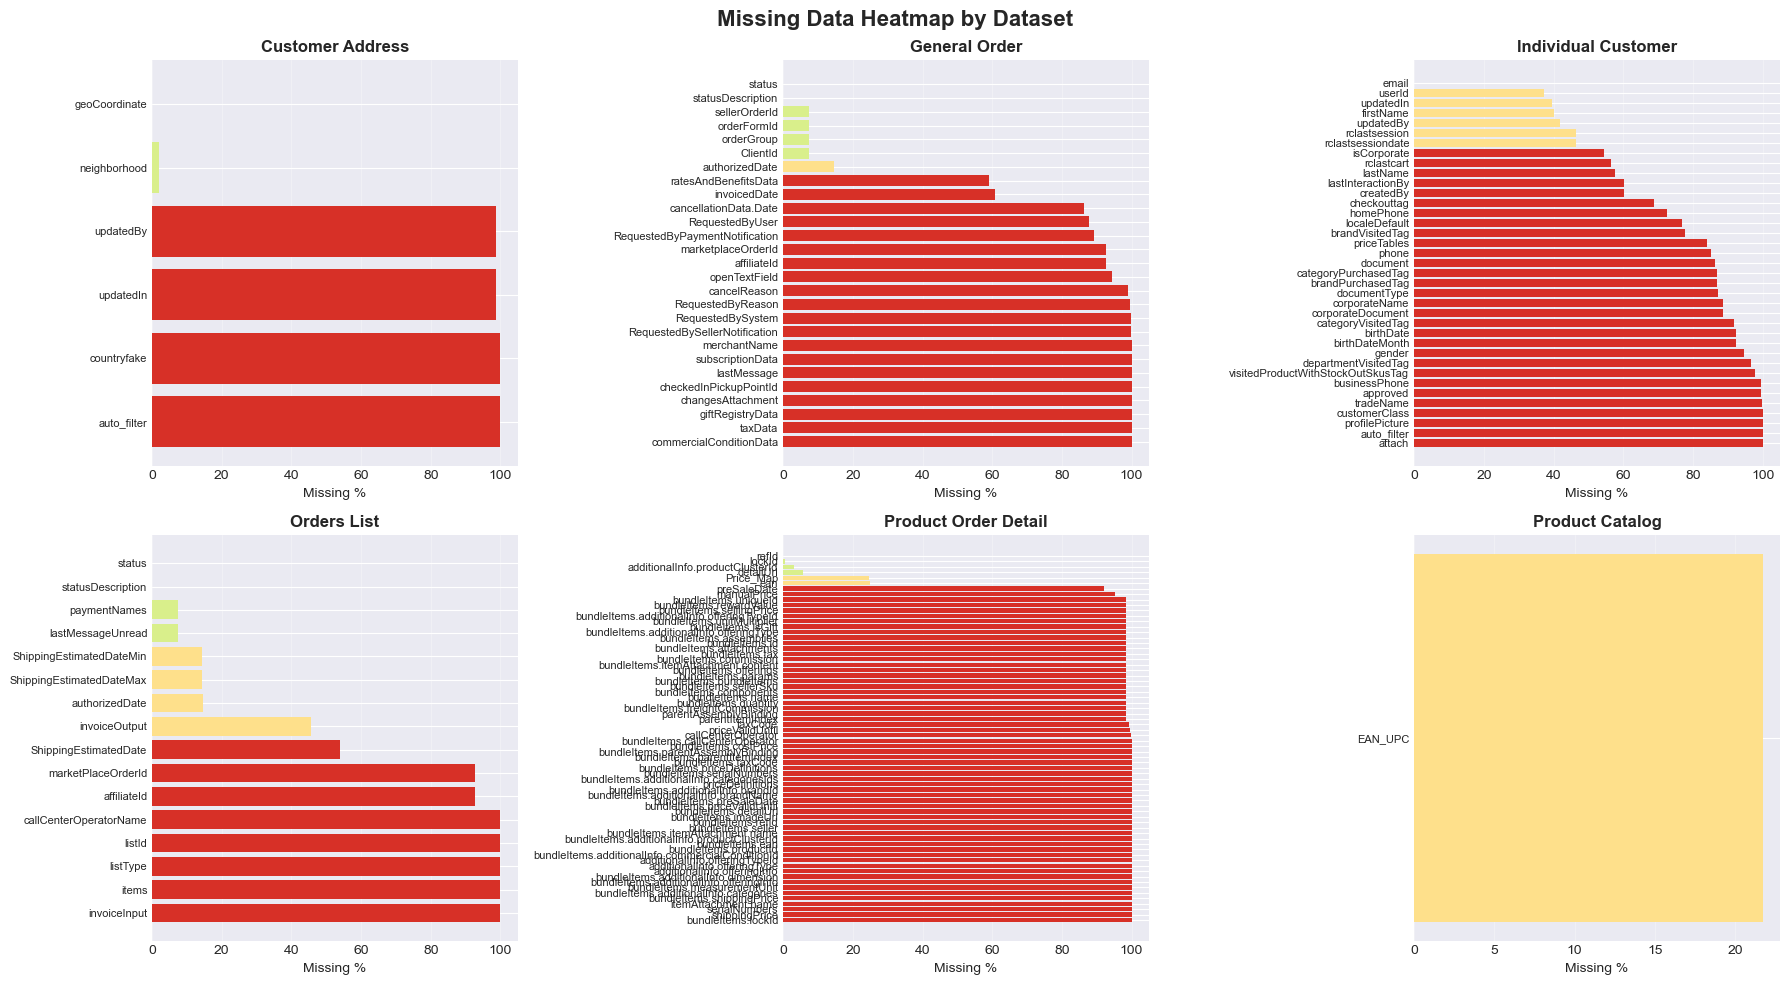

In [105]:
# Missing data heatmap for each dataset
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Missing Data Heatmap by Dataset', fontsize=16, fontweight='bold')
axes = axes.flatten()

for idx, (name, df) in enumerate(datasets.items()):
    # Calculate missing percentage for each column
    missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
    
    if missing_pct.sum() > 0:
        # Create heatmap for columns with missing data
        missing_cols = missing_pct[missing_pct > 0]
        if len(missing_cols) > 0:
            ax = axes[idx]
            colors = ['#d73027' if x > 50 else '#fee08b' if x > 10 else '#d9ef8b' for x in missing_cols.values]
            ax.barh(range(len(missing_cols)), missing_cols.values, color=colors)
            ax.set_yticks(range(len(missing_cols)))
            ax.set_yticklabels(missing_cols.index, fontsize=8)
            ax.set_xlabel('Missing %')
            ax.set_title(name, fontweight='bold')
            ax.grid(axis='x', alpha=0.3)
        else:
            axes[idx].text(0.5, 0.5, 'No Missing Data', ha='center', va='center', fontsize=12)
            axes[idx].set_title(name, fontweight='bold')
            axes[idx].axis('off')
    else:
        axes[idx].text(0.5, 0.5, 'No Missing Data', ha='center', va='center', fontsize=12)
        axes[idx].set_title(name, fontweight='bold')
        axes[idx].axis('off')

plt.tight_layout()
plt.show()

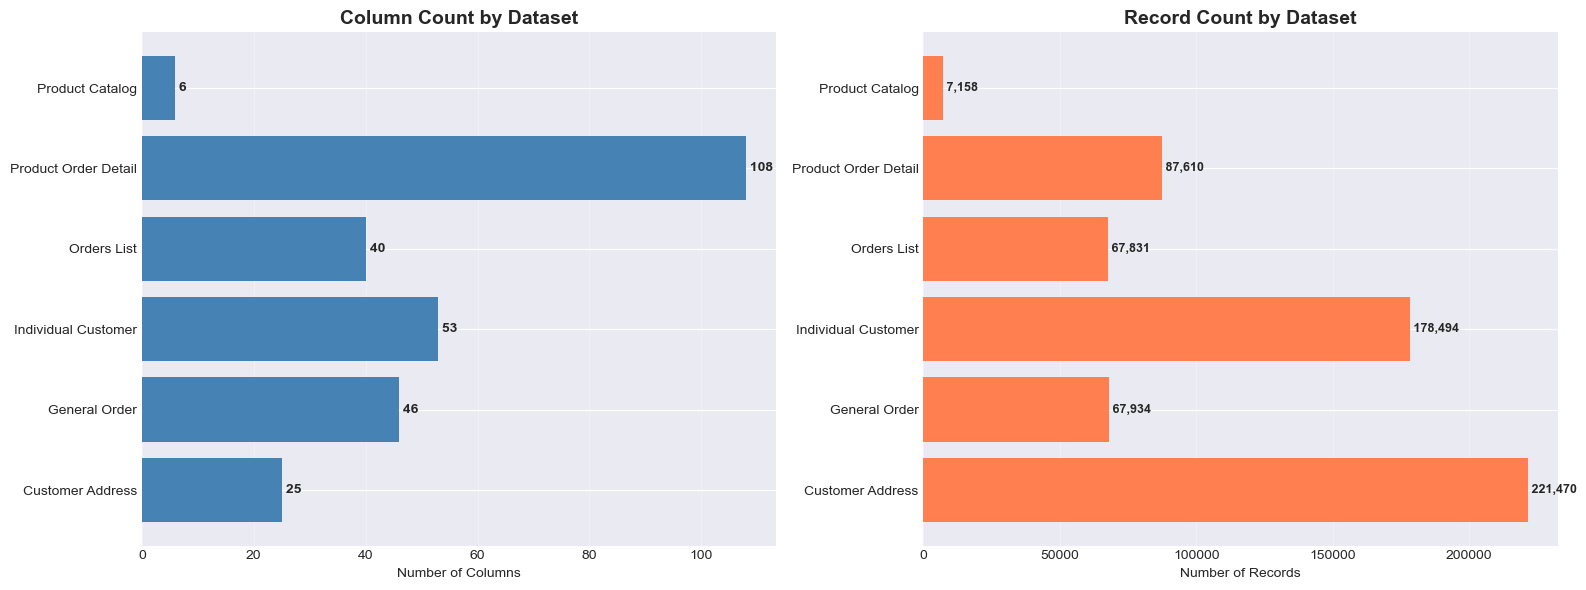

In [106]:
# Data type distribution across datasets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Column count by dataset
dataset_cols = {name: len(df.columns) for name, df in datasets.items()}
ax1.barh(list(dataset_cols.keys()), list(dataset_cols.values()), color='steelblue')
ax1.set_xlabel('Number of Columns')
ax1.set_title('Column Count by Dataset', fontweight='bold', fontsize=14)
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, (name, count) in enumerate(dataset_cols.items()):
    ax1.text(count, i, f' {count}', va='center', fontweight='bold')

# Chart 2: Record count by dataset
dataset_rows = {name: len(df) for name, df in datasets.items()}
ax2.barh(list(dataset_rows.keys()), list(dataset_rows.values()), color='coral')
ax2.set_xlabel('Number of Records')
ax2.set_title('Record Count by Dataset', fontweight='bold', fontsize=14)
ax2.grid(axis='x', alpha=0.3)
ax2.ticklabel_format(style='plain', axis='x')

# Add value labels
for i, (name, count) in enumerate(dataset_rows.items()):
    ax2.text(count, i, f' {count:,}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

## 10. Key Findings & Next Steps

Summary of exploratory analysis and recommendations for data cleaning phase.

In [107]:
print("="*80)
print("KEY FINDINGS SUMMARY")
print("="*80)

findings = """
📊 DATA QUALITY FINDINGS:
  • Total records across all datasets: {total_records:,}
  • Datasets with duplicates: {datasets_with_dups}
  • Datasets with missing values: {datasets_with_nulls}

🔗 TABLE RELATIONSHIPS:
  • Need to identify primary/foreign key relationships
  • Check if Customer IDs are consistent across tables
  • Validate Product IDs match between orders and catalog
  • Ensure Order IDs link properly across order tables

📅 TEMPORAL CONSIDERATIONS:
  • Identify all date/timestamp columns
  • Convert date columns to datetime format
  • Extract temporal features: year, month, day, week, quarter
  • Analyze seasonality patterns in sales

🧹 DATA CLEANING PRIORITIES:
  1. Standardize date formats and convert to datetime
  2. Handle missing values (strategy per column based on business logic)
  3. Remove or flag duplicates
  4. Validate referential integrity between tables
  5. Create analytical features (customer segments, product categories)
  6. Standardize categorical values (country names, categories)

📈 BUSINESS METRICS TO CALCULATE:
  • Total sales and revenue
  • Active customers (by period)
  • New vs returning customers
  • Customer reactivation rate
  • Sales by product category
  • Sales by country/region
  • Time-based trends (daily, weekly, monthly)

🎯 NEXT STEPS FOR WHIRLPOOL D2C PROJECT:
  1. ✅ Complete exploratory data analysis (current phase)
  2. ⏭️ Implement data cleaning and conditioning
  3. ⏭️ Create enriched analytical features
  4. ⏭️ Design dimensional model (fact & dimension tables)
  5. ⏭️ Load to SQL database using sqlalchemy
  6. ⏭️ Build BI dashboards for executive insights
"""

# Calculate summary stats
total_records = sum(len(df) for df in datasets.values())
datasets_with_dups = sum(1 for df in datasets.values() if df.duplicated().sum() > 0)
datasets_with_nulls = sum(1 for df in datasets.values() if df.isnull().sum().sum() > 0)

print(findings.format(
    total_records=total_records,
    datasets_with_dups=datasets_with_dups,
    datasets_with_nulls=datasets_with_nulls
))
print("="*80)

KEY FINDINGS SUMMARY

📊 DATA QUALITY FINDINGS:
  • Total records across all datasets: 630,497
  • Datasets with duplicates: 2
  • Datasets with missing values: 6

🔗 TABLE RELATIONSHIPS:
  • Need to identify primary/foreign key relationships
  • Check if Customer IDs are consistent across tables
  • Validate Product IDs match between orders and catalog
  • Ensure Order IDs link properly across order tables

📅 TEMPORAL CONSIDERATIONS:
  • Identify all date/timestamp columns
  • Convert date columns to datetime format
  • Extract temporal features: year, month, day, week, quarter
  • Analyze seasonality patterns in sales

🧹 DATA CLEANING PRIORITIES:
  1. Standardize date formats and convert to datetime
  2. Handle missing values (strategy per column based on business logic)
  3. Remove or flag duplicates
  4. Validate referential integrity between tables
  5. Create analytical features (customer segments, product categories)
  6. Standardize categorical values (country names, categories)
